In [5]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from google.colab import files
uploaded = files.upload()

# Load file setelah diunggah
cars_data = pd.read_csv('cars_clus.csv')


# Step 1: Re-load and preprocess the dataset
cars_data = pd.read_csv('cars_clus.csv')
cars_data.replace('$null$', np.nan, inplace=True)
cars_data.dropna(inplace=True)
numeric_cols = ['sales', 'resale', 'price', 'engine_s', 'horsepow',
                'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']
cars_data[numeric_cols] = cars_data[numeric_cols].apply(pd.to_numeric, errors='coerce')
scaler = MinMaxScaler()
cars_data_scaled = scaler.fit_transform(cars_data[numeric_cols])

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(cars_data_scaled)

# Step 3: Create a DataFrame for visualization
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Combine with the original data (optional for context)
pca_df = pd.concat([pca_df, cars_data[['manufact', 'model']].reset_index(drop=True)], axis=1)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Display results
pca_df.head(), explained_variance


Saving cars_clus.csv to cars_clus (2).csv


(        PC1       PC2 manufact    model
 0 -0.498778  0.133902    Acura  Integra
 1  0.062260  0.055649    Acura       TL
 2  0.316914  0.148369    Acura       RL
 3 -0.302009  0.137242     Audi       A4
 4  0.257984  0.023930     Audi       A6,
 array([0.55893702, 0.23470346]))

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(cars_data_scaled)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance)


Explained Variance: [0.55893702 0.23470346]


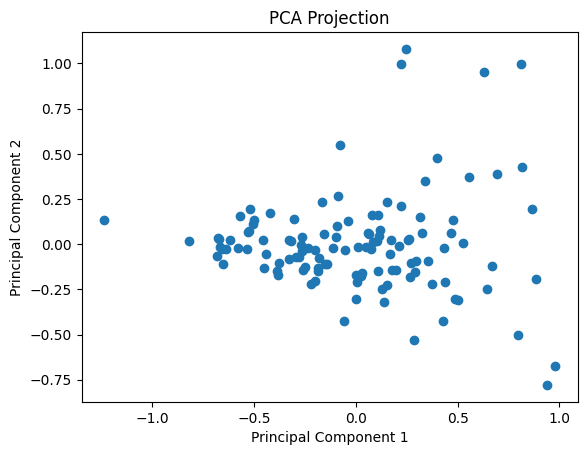

In [7]:
import matplotlib.pyplot as plt
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.show()
